In [1]:
# Import packages required for matrix and graphic representations

import pandas as pd

# Data Visualisation
import seaborn as sns
%matplotlib inline

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
#warnings.filterwarnings('once')
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import pandas as pd
from IPython.display import Markdown, display
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np
from sklearn import metrics

In [2]:
data = pd.read_csv('csv_finalCSVMulti.csv')
data.head()

,created_at,aid,extension,format,duration,FILE_STORED,FACIAL_ANALYSED,VOICE_ANALYSED,VOICE_TRANSCRIBED,BIOMETRICS_EXTRACTED,...,language,surprised_voice,no_speech_prob,entropy,tense_past,tense_present,tense_future,sentiment_polarity,sentiment_subjectivity,variable
0,1745237541,3f241254-97fe-4886-8297-3838d272ea84,.mp4,video,52,True,True,True,True,True,...,es,0.047122,0.031288,4.1018,0.0,1.0,0.0,-0.0617,0.7107,Ansiedad
1,1745237542,9e19679c-a1cb-4754-85ac-da0219e1398f,.mp4,video,60,True,True,True,True,True,...,es,0.039401,0.170642,4.4279,0.8,0.2,0.0,0.0830,0.4569,Ansiedad
2,1745237543,576c3f41-8d6a-402b-858a-54770ad42345,.mp4,video,51,True,True,True,True,True,...,es,0.022213,0.120449,4.0927,0.0,1.0,0.0,0.1143,0.6179,Ansiedad
3,1745237544,2bdea2f6-9cb8-4385-99e7-a4898b5b5391,.mp4,video,55,True,True,True,True,True,...,es,0.056491,0.040953,4.0626,0.0,1.0,0.0,0.0538,0.5182,Ansiedad
4,1745237545,c5d5a9fe-2dcb-4479-aec2-285d065cb55b,.mp4,video,45,True,True,True,True,True,...,es,0.028540,0.038975,4.0903,0.0,1.0,0.0,0.1500,0.6500,Ansiedad


In [3]:
# Copia del dataframe original
df = data.copy()

# Columnas a eliminar (sin eliminar 'language')
cols_to_drop = [
    'created_at', 'aid', 'extension', 'format', 'duration',
    'FILE_STORED', 'FACIAL_ANALYSED', 'VOICE_ANALYSED', 'VOICE_TRANSCRIBED',
    'BIOMETRICS_EXTRACTED', 'SPEECH_ANALYSED', 'PERSONALITY_ANALYSED',
    'FACES_EXTRACTED', 'id'
]

# Eliminar columnas
df.drop(columns=cols_to_drop, inplace=True)

# Comprobación
print(f"Número de columnas tras la limpieza: {df.shape[1]}")
df.head()

Número de columnas tras la limpieza: 68


,angry_facial,disgust_facial,fear_facial,happy_facial,sad_facial,surprise_facial,neutral_facial,most_frequent_dominant_emotion,dominant_emotion_counts_surprise,average_face_confidence,...,language,surprised_voice,no_speech_prob,entropy,tense_past,tense_present,tense_future,sentiment_polarity,sentiment_subjectivity,variable
0,0.0003,0.0001,0.1684,0.1863,0.3184,0.0000,0.3265,sad,NaN,0.9600,...,es,0.047122,0.031288,4.1018,0.0,1.0,0.0,-0.0617,0.7107,Ansiedad
1,0.0441,0.0001,0.0587,0.2474,0.1490,0.0262,0.4745,neutral,NaN,0.9150,...,es,0.039401,0.170642,4.4279,0.8,0.2,0.0,0.0830,0.4569,Ansiedad
2,0.0347,0.0000,0.1009,0.0003,0.4528,0.0000,0.4112,sad,NaN,0.9300,...,es,0.022213,0.120449,4.0927,0.0,1.0,0.0,0.1143,0.6179,Ansiedad
3,0.0066,0.0000,0.0686,0.0084,0.0150,0.0037,0.8976,neutral,NaN,0.9300,...,es,0.056491,0.040953,4.0626,0.0,1.0,0.0,0.0538,0.5182,Ansiedad
4,0.0118,0.0000,0.0192,0.0432,0.5066,0.0008,0.4183,neutral,NaN,0.9375,...,es,0.028540,0.038975,4.0903,0.0,1.0,0.0,0.1500,0.6500,Ansiedad


In [4]:
# Eliminar columna con demasiados nulos
df.drop(columns=['dominant_emotion_counts_surprise'], inplace=True)

In [5]:
columnas_con_nulos = df.columns[df.isnull().any()].tolist()

# 3. Rellenar según el tipo de dato
for col in columnas_con_nulos:
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])
        print(f"ℹ️ Columna categórica '{col}' rellenada con su moda")

# 4. Comprobar que ya no quedan nulos
total_nulos = df.isnull().sum().sum()
print(f"\n✅ Nulos restantes tras limpieza: {total_nulos}")

ℹ️ Columna categórica 'most_frequent_dominant_emotion' rellenada con su moda
ℹ️ Columna categórica 'language' rellenada con su moda

✅ Nulos restantes tras limpieza: 0


In [6]:
print(df['variable'].value_counts())

variable
Control      2433
Depresion    2260
Ansiedad     2233
Name: count, dtype: int64


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC
import pandas as pd

# 1. Separar X e y
X = df.drop(columns=['variable'])  # variable objetivo
y = df['variable']

# 2. Identificar columnas categóricas para codificar
columnas_categoricas = X.select_dtypes(include=['object', 'category']).columns.tolist()
print("Columnas categóricas a codificar:", columnas_categoricas)

# 3. Aplicar OneHotEncoding
X = pd.get_dummies(X, columns=columnas_categoricas, drop_first=True)

# 4. Dividir en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 5. Escalar variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Entrenar SVM con kernel RBF
svm_clf = SVC(kernel='rbf', probability=True, random_state=42)
svm_clf.fit(X_train_scaled, y_train)

# 7. Predicciones y evaluación
y_pred = svm_clf.predict(X_test_scaled)
y_proba = svm_clf.predict_proba(X_test_scaled)

print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Columnas categóricas a codificar: ['most_frequent_dominant_emotion', 'voice_mean_note', 'voice_median_note', 'voice_mode_note', 'voice_Q25_note', 'voice_Q75_note', 'language']
=== Classification Report ===
              precision    recall  f1-score   support

    Ansiedad       0.83      0.82      0.82       447
     Control       0.88      0.90      0.89       487
   Depresion       0.83      0.82      0.82       452

    accuracy                           0.85      1386
   macro avg       0.85      0.85      0.85      1386
weighted avg       0.85      0.85      0.85      1386

Accuracy: 0.847041847041847


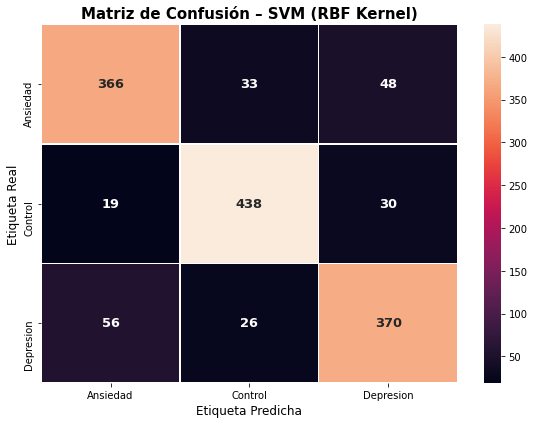

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=svm_clf.classes_)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="rocket",
            xticklabels=svm_clf.classes_, yticklabels=svm_clf.classes_,
            linewidths=0.5, linecolor='white', cbar=True,
            annot_kws={"size": 13, "weight": "bold"})

plt.title("Matriz de Confusión – SVM (RBF Kernel)", fontsize=15, fontweight='semibold')
plt.xlabel("Etiqueta Predicha", fontsize=12)
plt.ylabel("Etiqueta Real", fontsize=12)
plt.tight_layout()
plt.show()



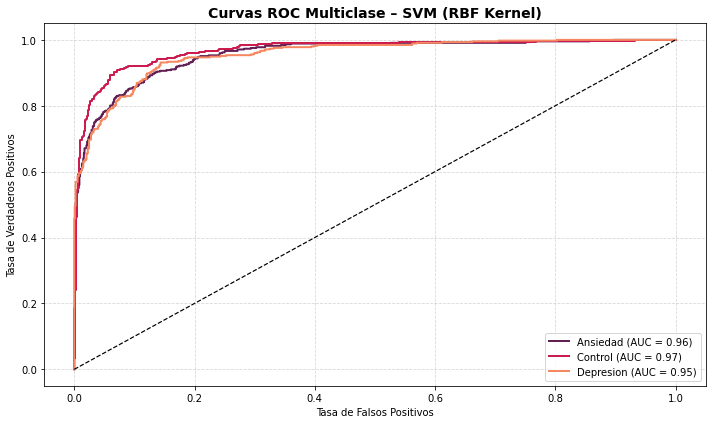

In [13]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np

# Binarizar etiquetas
y_bin = label_binarize(y_test, classes=svm_clf.classes_)
n_classes = y_bin.shape[1]

# Curvas ROC
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Nueva paleta "rocket"
rocket_colors = sns.color_palette("rocket", n_classes)

plt.figure(figsize=(10, 6))
for i, color in zip(range(n_classes), rocket_colors):
    plt.plot(fpr[i], tpr[i], lw=2, label=f"{svm_clf.classes_[i]} (AUC = {roc_auc[i]:.2f})", color=color)

plt.plot([0, 1], [0, 1], 'k--', lw=1.2)
plt.title("Curvas ROC Multiclase – SVM (RBF Kernel)", fontsize=14, fontweight='semibold')
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.legend(loc="lower right", fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


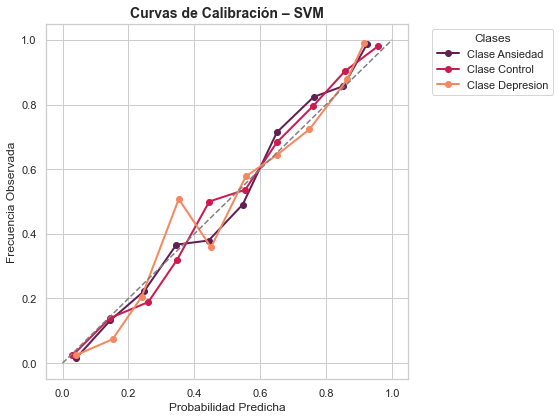

In [16]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid")
rocket_palette = sns.color_palette("rocket", n_colors=len(svm_clf.classes_))

plt.figure(figsize=(8, 6))

# Curvas de calibración por clase con colores rocket
for i, clase in enumerate(svm_clf.classes_):
    y_true_bin = (y_test == clase).astype(int)
    probas = y_proba[:, i]
    prob_true, prob_pred = calibration_curve(y_true_bin, probas, n_bins=10)
    plt.plot(prob_pred, prob_true, marker='o', label=f'Clase {clase}',
             linewidth=2, color=rocket_palette[i])

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("Curvas de Calibración – SVM", fontsize=14, fontweight='semibold')
plt.xlabel("Probabilidad Predicha", fontsize=12)
plt.ylabel("Frecuencia Observada", fontsize=12)
plt.legend(title="Clases", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()



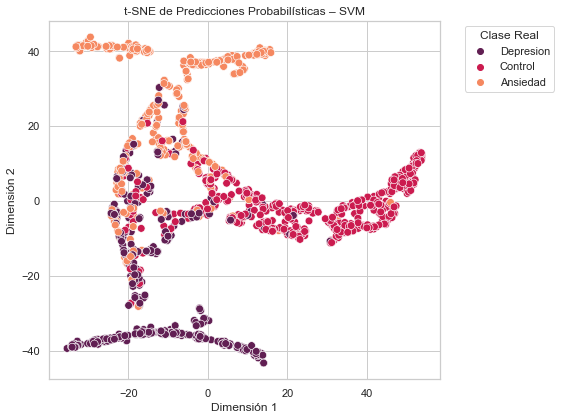

In [19]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

tsne = TSNE(n_components=2, random_state=42)
proba_2d = tsne.fit_transform(y_proba)

df_tsne = pd.DataFrame({
    'Dim1': proba_2d[:, 0],
    'Dim2': proba_2d[:, 1],
    'Clase Real': y_test.values
})

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_tsne, x='Dim1', y='Dim2', hue='Clase Real', palette='rocket', s=60)
plt.title("t-SNE de Predicciones Probabilísticas – SVM")
plt.xlabel("Dimensión 1")
plt.ylabel("Dimensión 2")
plt.legend(title="Clase Real", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



Este t-SNE sugiere que el modelo SVM está capturando bien las relaciones entre las clases, especialmente para diferenciar casos de "Control" frente a estados clínicos. Sin embargo, Depresión y Ansiedad comparten ciertas similitudes en el espacio de salida del modelo, lo cual tiene sentido clínico

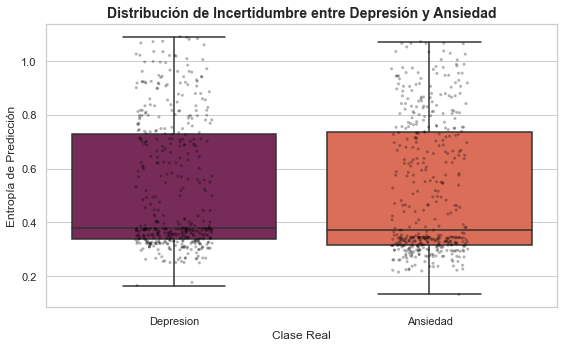

In [20]:
from scipy.stats import entropy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Asegurar que y_proba es array
y_proba = np.array(y_proba)

# Entropía por muestra
entropies = entropy(y_proba, axis=1)

# Crear DataFrame con entropía y clase real
df_entropia = pd.DataFrame({
    "Clase Real": y_test.values,
    "Entropía": entropies
})

# Filtrar solo Depresión y Ansiedad
df_entropia = df_entropia[df_entropia["Clase Real"].isin(["Depresion", "Ansiedad"])]

# Gráfico
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_entropia, x="Clase Real", y="Entropía", palette="rocket")
sns.stripplot(data=df_entropia, x="Clase Real", y="Entropía", color='black', alpha=0.3, jitter=0.15, size=3)

plt.title("Distribución de Incertidumbre entre Depresión y Ansiedad", fontsize=14, fontweight='semibold')
plt.xlabel("Clase Real", fontsize=12)
plt.ylabel("Entropía de Predicción", fontsize=12)
plt.tight_layout()
plt.show()


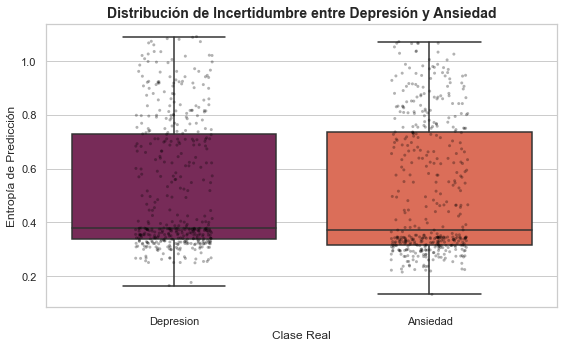

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Definir la rejilla de hiperparámetros
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}

# Ejecutar GridSearchCV
grid_search = GridSearchCV(
    SVC(probability=True, random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)

print("Mejores hiperparámetros (GridSearchCV):", grid_search.best_params_)
print("Mejor accuracy promedio en CV:", round(grid_search.best_score_, 4))


Mejores hiperparámetros (GridSearchCV): {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Mejor accuracy promedio en CV: 0.8403


In [24]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Definir distribución aleatoria de hiperparámetros
param_dist = {
    'C': uniform(0.1, 100),
    'gamma': uniform(0.0001, 0.1),
    'kernel': ['rbf']
}

# Ejecutar RandomizedSearchCV
random_search = RandomizedSearchCV(
    SVC(probability=True, random_state=42),
    param_distributions=param_dist,
    n_iter=30,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train_scaled, y_train)

print("Mejores hiperparámetros (RandomizedSearchCV):", random_search.best_params_)
print("Mejor accuracy promedio en CV:", round(random_search.best_score_, 4))



Mejores hiperparámetros (RandomizedSearchCV): {'C': 54.77102793432797, 'gamma': 0.018585445552552704, 'kernel': 'rbf'}
Mejor accuracy promedio en CV: 0.8451


In [25]:
# Entrenar modelo con mejores parámetros (puedes cambiar entre random_search o grid_search)
best_svm = random_search.best_estimator_
best_svm.fit(X_train_scaled, y_train)

y_pred = best_svm.predict(X_test_scaled)
y_proba = best_svm.predict_proba(X_test_scaled)

from sklearn.metrics import classification_report, accuracy_score
print("=== Classification Report (Mejor modelo) ===")
print(classification_report(y_test, y_pred))
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))


=== Classification Report (Mejor modelo) ===
              precision    recall  f1-score   support

    Ansiedad       0.88      0.85      0.87       447
     Control       0.90      0.92      0.91       487
   Depresion       0.87      0.88      0.87       452

    accuracy                           0.89      1386
   macro avg       0.88      0.88      0.88      1386
weighted avg       0.89      0.89      0.89      1386

Accuracy: 0.8853


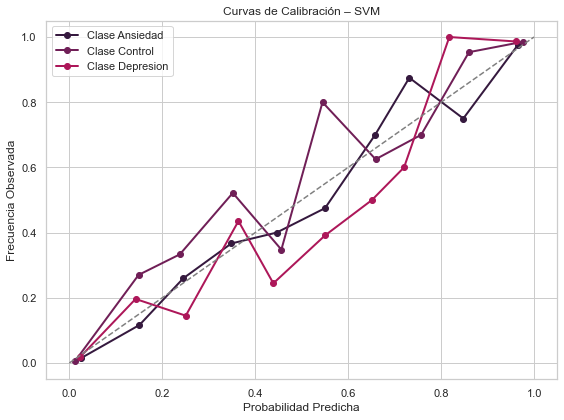

In [26]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="rocket")

plt.figure(figsize=(8, 6))
for i, clase in enumerate(svm_clf.classes_):
    y_true_bin = (y_test == clase).astype(int)
    probas = y_proba[:, i]
    prob_true, prob_pred = calibration_curve(y_true_bin, probas, n_bins=10)

    plt.plot(prob_pred, prob_true, marker='o', label=f'Clase {clase}', linewidth=2)

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("Curvas de Calibración – SVM")
plt.xlabel("Probabilidad Predicha")
plt.ylabel("Frecuencia Observada")
plt.legend()
plt.tight_layout()
plt.show()


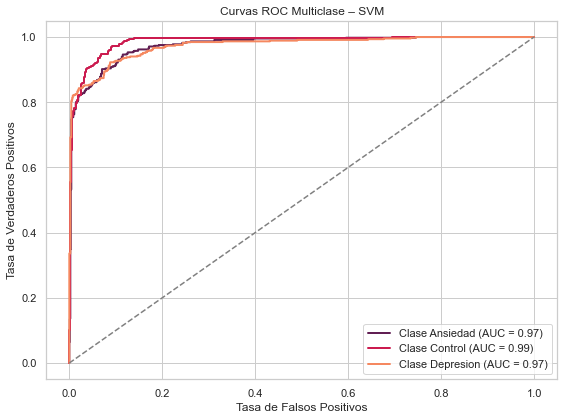

In [27]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Binarizar etiquetas
y_test_bin = label_binarize(y_test, classes=svm_clf.classes_)
n_classes = y_test_bin.shape[1]

plt.figure(figsize=(8, 6))
colors = sns.color_palette("rocket", n_classes)

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], lw=2, label=f'Clase {svm_clf.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC Multiclase – SVM')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


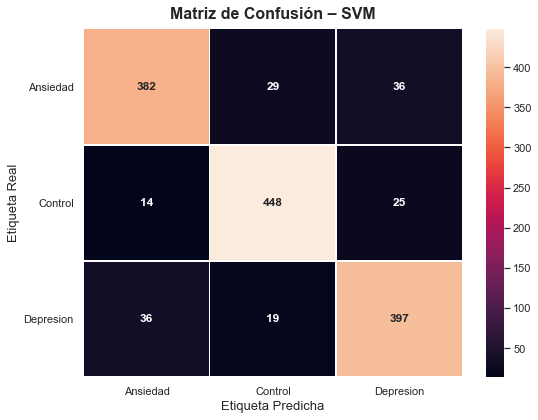

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=svm_clf.classes_)

plt.figure(figsize=(8, 6))
sns.heatmap(cm,
            annot=True,
            fmt="d",
            cmap="rocket",
            xticklabels=svm_clf.classes_,
            yticklabels=svm_clf.classes_,
            linewidths=0.5,
            linecolor='white',
            cbar=True,
            annot_kws={"size": 12, "weight": "bold"})

plt.title("Matriz de Confusión – SVM", fontsize=16, fontweight='semibold', pad=10)
plt.xlabel("Etiqueta Predicha", fontsize=13)
plt.ylabel("Etiqueta Real", fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11, rotation=0)

plt.tight_layout()
plt.show()


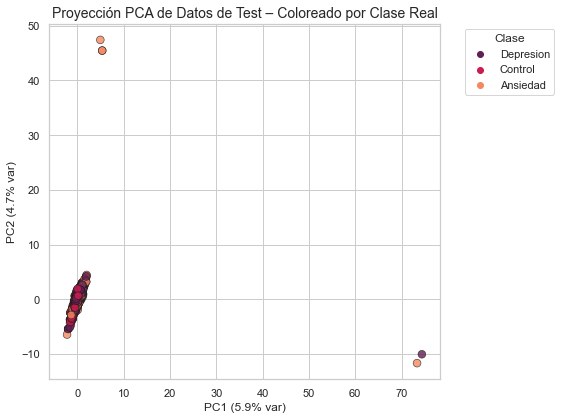

In [36]:

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Aplicar PCA sobre los datos escalados de test
pca = PCA(n_components=2, random_state=42)
X_test_pca = pca.fit_transform(X_test_scaled)

# Construir DataFrame con las dos componentes y las etiquetas reales
df_pca = pd.DataFrame(X_test_pca, columns=['PC1', 'PC2'])
df_pca['Clase Real'] = y_test.reset_index(drop=True)

# Gráfico con la paleta "rocket"
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Clase Real', palette='rocket', alpha=0.8, s=60, edgecolor='k')
plt.title("Proyección PCA de Datos de Test – Coloreado por Clase Real", fontsize=14)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% var)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% var)")
plt.legend(title='Clase', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



El PCA muestra que los primeros dos componentes explican solo una pequeña parte de la varianza total (~10.6%), lo que es habitual cuando se trabaja con datos de alta dimensión con muchas variables codificadas por OneHotEncoding.

Aunque no hay separación clara, el gráfico permite detectar posibles outliers y verificar si alguna clase domina zonas concretas del espacio proyectado.

Para una separación más reveladora, pueden usarse métodos no lineales como t-SNE (ya aplicado antes) o UMAP si buscas otra alternativa

In [38]:
# Mostrar las clases detectadas por el modelo
print("Clases detectadas en svm_clf:", svm_clf.classes_)

# Buscar ansiedades y depresiones "reales"
clases_detectadas = [c.lower().strip() for c in svm_clf.classes_]

# Encontrar posición de 'ansiedad' y 'depresion' ignorando tildes, mayúsculas, espacios
idx_ansiedad = next((i for i, c in enumerate(clases_detectadas) if 'ansiedad' in c), None)
idx_depresion = next((i for i, c in enumerate(clases_detectadas) if 'depresion' in c), None)

print(f"Índice ansiedad: {idx_ansiedad} → Clase real: {svm_clf.classes_[idx_ansiedad] if idx_ansiedad is not None else 'No encontrada'}")
print(f"Índice depresión: {idx_depresion} → Clase real: {svm_clf.classes_[idx_depresion] if idx_depresion is not None else 'No encontrada'}")



Clases detectadas en svm_clf: ['Ansiedad' 'Control' 'Depresion']
Índice ansiedad: 0 → Clase real: Ansiedad
Índice depresión: 2 → Clase real: Depresion


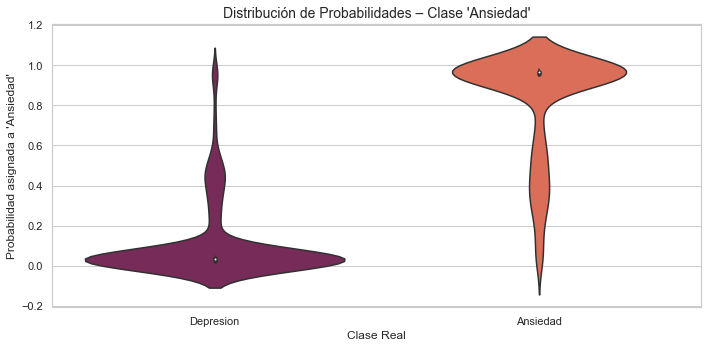

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Índices corregidos
idx_ansiedad = svm_clf.classes_.tolist().index('Ansiedad')
idx_depresion = svm_clf.classes_.tolist().index('Depresion')

# Probabilidades predichas
ansiedad_probs = y_proba[:, idx_ansiedad]
depresion_probs = y_proba[:, idx_depresion]

df_probs = pd.DataFrame({
    'Probabilidad Ansiedad': ansiedad_probs,
    'Probabilidad Depresion': depresion_probs,
    'Etiqueta Real': y_test.reset_index(drop=True)
})

plt.figure(figsize=(10, 5))
sns.violinplot(data=df_probs[df_probs['Etiqueta Real'].isin(['Ansiedad', 'Depresion'])],
               x='Etiqueta Real', y='Probabilidad Ansiedad', palette="rocket")
plt.title("Distribución de Probabilidades – Clase 'Ansiedad'", fontsize=14)
plt.ylabel("Probabilidad asignada a 'Ansiedad'")
plt.xlabel("Clase Real")
plt.tight_layout()
plt.show()


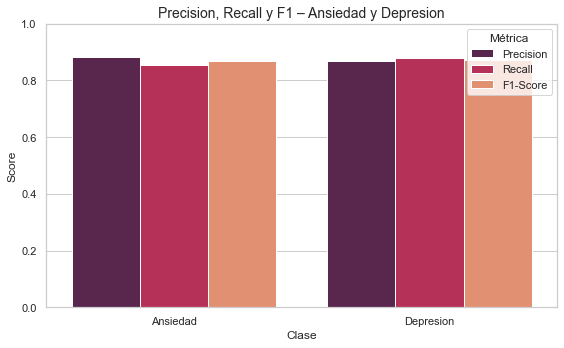

In [40]:
from sklearn.metrics import precision_recall_fscore_support

metrics = precision_recall_fscore_support(y_test, y_pred, labels=['Ansiedad', 'Depresion'])

df_metrics = pd.DataFrame(metrics[:3],  # precision, recall, f1
                          index=['Precision', 'Recall', 'F1-Score'],
                          columns=['Ansiedad', 'Depresion']).T

df_metrics = df_metrics.reset_index().melt(id_vars='index', var_name='Métrica', value_name='Valor')

plt.figure(figsize=(8, 5))
sns.barplot(data=df_metrics, x='index', y='Valor', hue='Métrica', palette='rocket')
plt.title("Precision, Recall y F1 – Ansiedad y Depresion", fontsize=14)
plt.ylabel("Score")
plt.xlabel("Clase")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


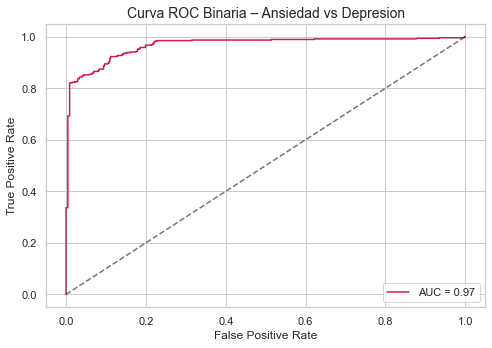

In [41]:

from sklearn.metrics import roc_curve, auc

# Filtro para solo esas dos clases
mask_bin = y_test.isin(['Ansiedad', 'Depresion'])
y_test_bin = y_test[mask_bin].reset_index(drop=True)
y_proba_bin = y_proba[mask_bin]

# Binarizar: Depresion = 1, Ansiedad = 0
y_bin = (y_test_bin == 'Depresion').astype(int)
score_bin = y_proba_bin[:, idx_depresion]

fpr, tpr, _ = roc_curve(y_bin, score_bin)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color=sns.color_palette("rocket", 1)[0])
plt.plot([0, 1], [0, 1], 'k--', alpha=0.6)
plt.title("Curva ROC Binaria – Ansiedad vs Depresion", fontsize=14)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.tight_layout()
plt.show()


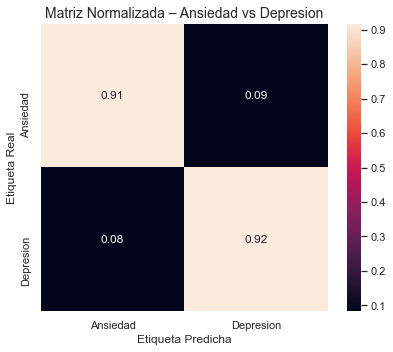

In [42]:
# Asegurarse de que cm_df está definido como matriz de confusión en DataFrame
sub_cm = cm_df.loc[['Ansiedad', 'Depresion'], ['Ansiedad', 'Depresion']]
sub_cm_norm = sub_cm.div(sub_cm.sum(axis=1), axis=0)

plt.figure(figsize=(6, 5))
sns.heatmap(sub_cm_norm, annot=True, fmt=".2f", cmap="rocket", cbar=True, square=True)
plt.title("Matriz Normalizada – Ansiedad vs Depresion", fontsize=14)
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")
plt.tight_layout()
plt.show()
